<a href="https://colab.research.google.com/github/thientvse/Packt-Workshop/blob/master/DataScience/2.Regression/Loading_and_Preparing_the_Data_for_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline 
import matplotlib as mpl 
import seaborn as sns 
import matplotlib.pyplot as plt 
import statsmodels.formula.api as smf 
import statsmodels.graphics.api as smg 
import pandas as pd 
import numpy as np 
import patsy 
from statsmodels.graphics.correlation import plot_corr 
from sklearn.model_selection import train_test_split 
plt.style.use('seaborn') 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
rawBostonData = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter02/Dataset/Boston.csv')

In [3]:
rawBostonData.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [0]:
rawBostonData = rawBostonData.dropna()

In [0]:
rawBostonData = rawBostonData.drop_duplicates()

In [6]:
list(rawBostonData.columns)

['CRIM',
 ' ZN ',
 'INDUS ',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT',
 'MEDV']

In [7]:
renamedBostonData = rawBostonData.rename(columns = {'CRIM':'crimeRatePerCapita', 
 ' ZN ':'landOver25K_sqft', 
 'INDUS ':'non-retailLandProptn', 
 'CHAS':'riverDummy', 
 'NOX':'nitrixOxide_pp10m', 
 'RM':'AvgNo.RoomsPerDwelling', 
 'AGE':'ProptnOwnerOccupied', 
 'DIS':'weightedDist', 
 'RAD':'radialHighwaysAccess', 
 'TAX':'propTaxRate_per10K', 
 'PTRATIO':'pupilTeacherRatio', 
 'LSTAT':'pctLowerStatus', 
 'MEDV':'medianValue_Ks'}) 
renamedBostonData.head() 

,crimeRatePerCapita,landOver25K_sqft,non-retailLandProptn,riverDummy,nitrixOxide_pp10m,AvgNo.RoomsPerDwelling,ProptnOwnerOccupied,weightedDist,radialHighwaysAccess,propTaxRate_per10K,pupilTeacherRatio,pctLowerStatus,medianValue_Ks
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [8]:
renamedBostonData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   crimeRatePerCapita      506 non-null    float64
 1   landOver25K_sqft        506 non-null    float64
 2   non-retailLandProptn    506 non-null    float64
 3   riverDummy              506 non-null    int64  
 4   nitrixOxide_pp10m       506 non-null    float64
 5   AvgNo.RoomsPerDwelling  506 non-null    float64
 6   ProptnOwnerOccupied     506 non-null    float64
 7   weightedDist            506 non-null    float64
 8   radialHighwaysAccess    506 non-null    int64  
 9   propTaxRate_per10K      506 non-null    int64  
 10  pupilTeacherRatio       506 non-null    float64
 11  pctLowerStatus          506 non-null    float64
 12  medianValue_Ks          506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 55.3 KB


In [9]:
renamedBostonData.describe(include=[np.number]).T

,count,mean,std,min,25%,50%,75%,max
crimeRatePerCapita,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
landOver25K_sqft,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
non-retailLandProptn,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
riverDummy,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nitrixOxide_pp10m,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
AvgNo.RoomsPerDwelling,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
ProptnOwnerOccupied,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
weightedDist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
radialHighwaysAccess,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
propTaxRate_per10K,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [0]:
X = renamedBostonData.drop('crimeRatePerCapita', axis = 1)
y = renamedBostonData[['crimeRatePerCapita']]
seed = 10
test_data_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_data_size, random_state = seed)
train_data = pd.concat([X_train, y_train], axis = 1)
test_data = pd.concat([X_test, y_test], axis = 1)

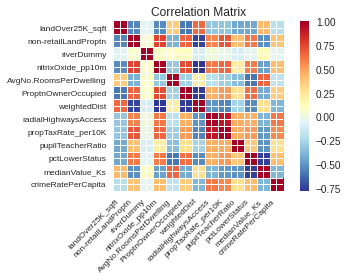

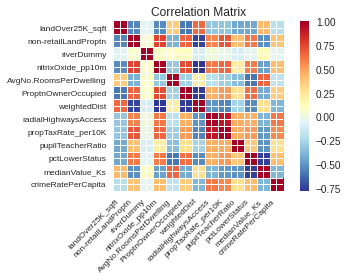

In [11]:
corrMatrix = train_data.corr(method = 'pearson')
xnames=list(train_data.columns)
ynames=list(train_data.columns)
plot_corr(corrMatrix, xnames=xnames, ynames=ynames,\
          title=None, normcolor=False, cmap='RdYlBu_r')

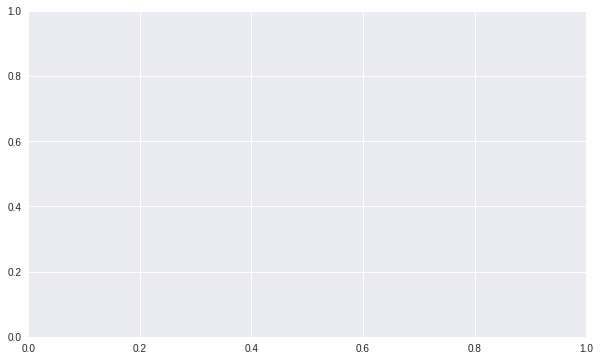

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))

In [14]:
sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', ci=None, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})

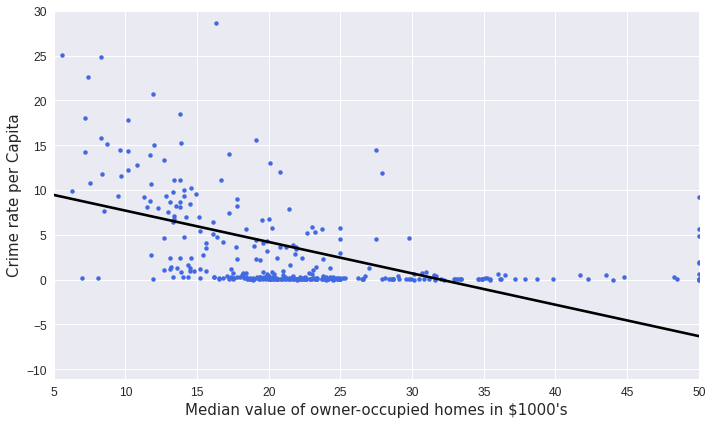

In [19]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x='medianValue_Ks', y='crimeRatePerCapita', ci=None, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=30)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

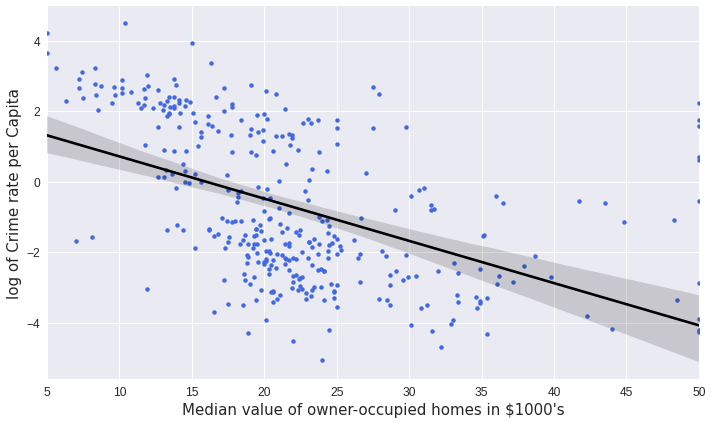

In [23]:
fig, ax = plt.subplots(figsize=(10, 6))
y = np.log(train_data['crimeRatePerCapita'])
sns.regplot(x='medianValue_Ks', y=y, ci=95, data=train_data, ax=ax, color='k', scatter_kws={"s": 20,"color": "royalblue", "alpha":1})
ax.set_ylabel('log of Crime rate per Capita', fontsize=15, fontname='DejaVu Sans')
ax.set_xlabel("Median value of owner-occupied homes in $1000's", fontsize=15, fontname='DejaVu Sans')
ax.set_xlim(left=None, right=None)
ax.set_ylim(bottom=None, top=None)
ax.tick_params(axis='both', which='major', labelsize=12)
fig.tight_layout()

In [0]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split

In [0]:
linearModel = smf.ols(formula='crimeRatePerCapita ~ medianValue_Ks', data=train_data)

In [0]:
linearModelResult = linearModel.fit()

In [27]:
print(linearModelResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     59.02
Date:                Tue, 26 May 2020   Prob (F-statistic):           1.56e-13
Time:                        09:45:21   Log-Likelihood:                -1217.4
No. Observations:                 354   AIC:                             2439.
Df Residuals:                     352   BIC:                             2447.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         11.2094      1.079     10.

In [0]:
import statsmodels.formula.api as smf
import pandas as pd
from sklearn.model_selection import train_test_split

In [0]:
multiLinearModel = smf.ols(formula='crimeRatePerCapita ~ pctLowerStatus + radialHighwaysAccess + medianValue_Ks + nitrixOxide_pp10m', data=train_data)

In [0]:
multiLinearModResult = multiLinearModel.fit()

In [31]:
print(multiLinearModResult.summary())

                            OLS Regression Results                            
Dep. Variable:     crimeRatePerCapita   R-squared:                       0.398
Model:                            OLS   Adj. R-squared:                  0.391
Method:                 Least Squares   F-statistic:                     57.77
Date:                Tue, 26 May 2020   Prob (F-statistic):           2.19e-37
Time:                        09:47:16   Log-Likelihood:                -1154.9
No. Observations:                 354   AIC:                             2320.
Df Residuals:                     349   BIC:                             2339.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                0.8912 